In [5]:
1

1

In [2]:
import numpy as np

## Part 1

def insideCylinders(pos,r):
    x, y, z = pos
    # Return true if the point is inside the Steinmetz solid
    # write some code here
    if x**2+y**2<=r**2 and y**2+z**2<=r**2:
        return True
    else:
        return False

## Part 2

def prob_inside_volume(N,r):
    n=0
    for i in range(N):
        x=np.random.uniform(-r,r)
        y=np.random.uniform(-r,r)
        z=np.random.uniform(-r,r)
        pos=x,y,z
        if insideCylinders(pos,r):
            n+=1
    # Calculate the probability that any point is inside the Steinmetz solid
    return n/N

## Part 3
N = 1000
r = 1
# Determine approximated volume
volume_approx=prob_inside_volume(N,r)*((2*r)**3)
volume_approx

5.312

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Randomness

What type of problems can we solve with the help of random numbers?

We can compute (potentially) complicated averages:

*   How much my stock/option portfolio is going to be worth?
*   What are my odds to win a certain competition?



### Random Number Generators

*   Computers are deterministic - operations are reproducible
*   How do we get random numbers out of a deterministic machine?

You can use the library `numpy.random` to generate random numbes:

In [1]:
import numpy as np

np.random.rand(10)

array([0.52518851, 0.1689753 , 0.26963603, 0.49288251, 0.80717177,
       0.95074384, 0.96880547, 0.31386315, 0.8934752 , 0.22692594])

If you want to generate a random integer number over a given range, you can use

`np.random.randint(low,high)`

that returns a random integer from low (inclusive) to high (exclusive).

In [32]:
N=10
xy=6*np.random.rand(N,2)-3
z=2*np.random.rand(N,1)
for i in range(N):
    xi,yi=list(xy[i])
    zi=list(z[i])[0]
    if xi

Note that if you use the library `random` to accomplish the same thing:

`random.randint(low,high)`

the function returns a random integer from low (inclusive) to high (**inclusive**).

In [ ]:
import random
random.randint(1,10)

Generating many random numbers at one, using a numpy array:

In [ ]:
np.random.seed(10)
for x in range(0, 20):
    numbers = np.random.rand(6)
    print(numbers)

They all seem random correct? Let's try to fix something called **seed** using  
np.random.seed(10)

What do you observe? 

Let's see what this seed is...

## Pseudo-random Numbers

* Numbers and sequences appear random, but they are actually reproducible
* Great for algorithm developing and debugging
* How truly "random" are these numbers?

## Linear congruential generator

Given the parameters $a$, $c$, $m$ and $s$, where $s$ is the seed value, this algorithm will generate a sequence of pseudo-random numbers:

$x_o = s $

$x_{n+1} = (a x_n + c) mod(m)$

In [7]:
s = 1 # seed
a =  4 # multiplier
c = 1 # increment
m = 5 # modulus

n = 60
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m

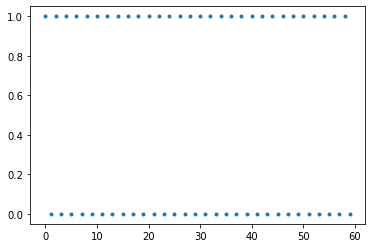

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,'.')

Notice there is a period, when numbers eventually start repeating.  One of the advantages of the LCG is that by using appropriate choice for the parameters, we can obtain known and long periods.

Check here https://en.wikipedia.org/wiki/Linear_congruential_generator for a list of commonly used parameters of LCGs.

Let's try using the parameters from 
[Numerical recipes](https://en.wikipedia.org/wiki/Numerical_Recipes)

In [ ]:
s = 30
a = 1664525
c = 1013904223
m = 2**32

n = 300
x = np.zeros(n)
x[0] = s
for i in range(1,n):
    x[i] = (a * x[i-1] + c) % m

plt.plot(x,'.')

"Good" random number generators:

- Random pattern
- Long period
- Efficiency
- Repeatability
- Portability


# Random Variables

Think of a random variable $X$ as a function that maps the outcome of an unpredictable (random) processes to numerical quantities.

For example:

* $X$ = the face of a bread when it falls on the ground. The random value can abe the "buttered" side or the "not buttered" side
* $X$ = value that appears on top of dice after each roll

We don't have an exact number to represent these random processes, but we can get something that represents the **average** case. To do that, we need to know the likelihood of each individual value of $X$.

### Coin toss

Random variable $X$: result of a coin toss

In each toss, the random variable can take the values $x_1 = 0$ (tail) and $x_2 = 1$ (head), and each $x_i$ has probability $p_i = 0.5$. 

The **expected value** of a discrete random variable is defined as:

$$ E(x) = \sum_{i=1}^{m} p_i x_i $$

Hence for a coin toss we have:

$$ E(x) = 1(0.5) + 0(0.5) = 0.5 $$

### Roll Dice

Random variable $X$: value that appears on top of the dice after each roll

In each toss, the random variable can take the values $x_i = 1,2,3,...,6$ and each $x_i$ has probability $p_i = 1/6$. 

The **expected value** of the discrete random variable is defined as:

In [ ]:
E = 0
for i in range(1,7):
    E += (i)*(1/6)
E

#  Monte Carlo Methods

Monte Carlo methods are algorithms that rely on repeated random sampling to approximate a desired quantity.

### Example 1: Simulating a coin toss experiment

We want to find the probability of heads when tossing a coin. We know the expected value is 0.5. Using Monte Carlo with N samples (here tosses), our estimate of the expected value is:

$$E = \frac{1}{N}\sum_{i=1}^N f(x_i) = \frac{1}{N}\sum_{i=1}^N x_i$$ 

where $x_i = 1$ if the toss gives head.

Let's toss a "fair" coin N times and record the results for each toss.

But first, how can we simulate one toss?

In [ ]:
toss = np.random.choice([0,1])
print(toss)


In [ ]:
N = 30 # number of samples (tosses)
M = 30
heads = []
for j in range(M):
    toss_list = []
    for i in range(N):
        toss = np.random.choice([0,1])
        toss_list.append(toss)
    #print(toss_list)
    expec = np.array(toss_list).sum()/N
    heads.append(expec)
print(heads)

heads = np.array(heads)

Note that if we run the code snippet above again, it is likely we will get a different result. What if we run this many times? 

In [ ]:
N = 300 # number of tosses
M = 300 # number of numerical experiments
nheads = []
for j in range(M):   
    toss_list = []
    for i in range(N):
        toss_list.append(np.random.choice([0,1]))
    nheads.append( np.array(toss_list).sum()/N ) 
nheads = np.array(nheads);

In [ ]:
plt.hist(nheads);

In [ ]:
print(nheads.mean(),nheads.std())

What happens when we increase the number of numerical experiments?
What happens when we increase the number of samples (in this case, the number of tosses)?

### B) Monte Carlo to approximate integrals

One of the most important applications of Monte Carlo methods is in estimating volumes and areas that are difficult to compute analytically. Without loss of generality we will first present Monte Carlo to approximate two-dimensional integrals. Nonetheless, Monte Carlo is a great method to solve high-dimensional problems. 

To approximate an integration

$$ A = \int_{x_1}^{x_2} \int_{y_1}^{y_2} f(x,y) dx dy $$

we sample points uniformily inside a domain $D = [x_1,x_2] \times [y_1,y2]$, i.e. we let $X$ be a uniformily distributed random variable on $D$. 




Using Monte Carlo with N sample points, our estimate for the expected value  is:

$$ S_N = \frac{1}{N} \sum_{i=1}^{N} f(X_i) $$

which gives the approximate for the integral:

$$ A_N = (x_2 - x_1)(y_2-y_1) \frac{1}{N} \sum_{i=1}^{N} f(X_i) $$

Law of large numbers:

as $N \rightarrow \infty$, the sample average $S_N$ converges the the expected value $E(X)$ and hence $A_N \rightarrow A$

### Example 2: Approximate the area of a circle

We will use Monte Carlo Method to approximate the area of a circle of radius R = 1.

- Let's start with a uniform distribution on the unit square  [0,1]×[0,1] . Create a 2D array samples of shape (2, N):

- Scale the sample points "samples", so that we have a uniform distribution inside a square $[-1,1]\times [-1,1]$. Calculate the distance from each sample point to the origin $(0,0)$

In [ ]:
N = 10**2
samples = np.random.rand(2, N)
xy = samples * 2 - 1.0 # scale sample points
r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius
xy.shape

In [ ]:
plt.plot(xy[0,:], xy[1,:], 'k.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

We then count how many of these points are inside the circle centered at the origin.

In [ ]:
incircle = (r <= 1)
count_incircle = incircle.sum()
print(count_incircle)

And the approximated value for the area is:

In [ ]:
A_approx = (2*2) * (count_incircle)/N
A_approx

We can assign different colors to the points inside the circle and plot (just for vizualization purposes).

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(xy[0,np.where(incircle)[0]], xy[1,np.where(incircle)[0]], 'b.')
plt.plot(xy[0,np.where(incircle==False)[0]], xy[1,np.where(incircle==False)[0]], 'r.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y');

Combine all the relevant code above, so we can easily run this numerical experiment for different sample size N.

In [ ]:
N = 10**2
samples = np.random.rand(2, N)
xy = samples * 2 - 1.0 # scale sample points
r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius
incircle = (r <= 1)
count_incircle = incircle.sum()
A_approx = (2*2) * (count_incircle)/N
print(A_approx)

Perform the same above, but now store the approximated area for different N, and plot:

In [ ]:
N = 10**6
samples = np.random.rand(2, N)
xy = samples * 2 - 1.0 # scale sample points
r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius
incircle = (r <= 1)

plt.figure(figsize=(10,6))
plt.plot(xy[0,np.where(incircle)[0]], xy[1,np.where(incircle)[0]], 'b.')
plt.plot(xy[0,np.where(incircle==False)[0]], xy[1,np.where(incircle==False)[0]], 'r.')
plt.axis('equal')

N_samples = np.arange(1,N+1)
A_approx = 4 * incircle.cumsum() / N_samples

print('The approximated area is ', A_approx[-1] )

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(A_approx)

Which as expected gives an approximation for the number $\pi$, since the circle has radius 1.

Let's plot the error of our approximation:

In [ ]:
plt.figure(figsize=(10,6))
plt.loglog(N_samples, np.abs(A_approx - np.pi), '.')
plt.xlabel('n')
plt.ylabel('error')

In [ ]:
plt.figure(figsize=(8,6));
plt.loglog(N_samples, np.abs(A_approx - np.pi), '.');
plt.xlabel('n');
plt.ylabel('error');
plt.loglog(N_samples, 1/N_samples**2, '.');
plt.loglog(N_samples, 1/N_samples, 'r');
plt.loglog(N_samples, 1/np.sqrt(N_samples), 'm');

The asymptotic behavior of the error resulting from Monte Carlo methods is

$$ O\left(\frac{1}{\sqrt{N}}\right) $$
 
where $N$ is the number of samples.


In [ ]:
N = 10**4 # number of sample points
M = 1000  # number of numerical experiments

A_list = []

for i in range(M):
    samples = np.random.rand(2, N)
    xy = samples * 2 - 1.0 # scale sample points
    r = np.sqrt(xy[0, :]**2 + xy[1, :]**2)  # calculate radius
    incircle = (r <= 1)
    count_incircle = incircle.sum()
    A_list.append( (2*2) * (count_incircle)/N )

A_array = np.array(A_list)

plt.hist(A_list)
plt.xlim([2.6,3.6])

**By increasing the number of sample points, we reduce the variance of the distribution.**

### Example 3 - Calculating a Volume of Intersection

In this exercise, we will use Monte Carlo integration to compute a volume of intersection between two cylinders. This integral is possible to compute analytically, so we can compare our answer to the true result and see how accurate it is.

The solid common to two right circular cylinders of equal radii intersecting at right angles is called the Steinmetz solid.

Two cylinders intersecting at right angles are called a bicylinder or mouhefanggai (Chinese for "two square umbrellas").

![](https://github.com/cs357/demos-cs357/blob/master/figures/steinmetz.JPG?raw=1)

http://mathworld.wolfram.com/SteinmetzSolid.html

To help you check if you are going in the right direction, you can copy the functions you define here inside PrairieLearn.

https://prairielearn.engr.illinois.edu/pl/course_instance/52088/assessments

#### a) Write a function that will determine if a given point is inside both cylinders

Write the function `insideCylinders` that given a NumPy array representing some arbitrary point in a 3-dimensional space returns `true` if the point is inside both cylinders. Assume the solid is centered at the origin, the cylinders are along the $x$ and $z$ axes and both have radius $r$

```python
def insideCylinders(pos,r):
    # pos = np.array([x,y,z])
    # r = radius of the cylinders
    return bool
```

#### b) Write a function to evaluate the probability the point is inside the given volume
The function `prob_inside_volume` should take as argument the number of random points N.

The function generate N random points inside a box around the intersection of the cylinders, and uses the function `insideCylinders` to determine if the point is inside the cylinders or not. Recall that these random points should be generated in a form of a NumPy array.

Track the number of points $C$ that fall inside both cylinders. Return the ratio $C/N$ as a floating point number.

```python
def prob_inside_volume(N,r):
    # N = number of sample points
    # r = radius of the cylinders
    return float
```

#### c) Use the ratio $\frac{C}{N}$ to estimate the volume of intersection

To approximate the volume of the intersection, we use:

$$ V_N = V_D \frac{1}{N} \sum_{i=1}^{N} f(X_i) =  V_D \frac{C}{N} $$

where $ V_D$ is the volume of the domain used to generate the sample points. In this example, we considered the domain as the box around the intersection of the cylinders, hence 

$$ V_D = (2r)^3 $$

Use your function `prob_inside_volume` to approximate the volume $V_{N}$ for $N = 1000$ for cylinders of radius 1.

In [ ]:
N = 1000
r = 1
Vn = ...
print(Vn)

#### d) Comparing with the exact solution

Two cylinders of radius r oriented long the z- and x-axes gives the equations $x^2+y^2=r^2$ and $y^2+z^2=r^2$ 

The volume common to two cylinders was known to Archimedes and the Chinese mathematician Tsu Ch'ung-Chih, and does not require calculus to derive. Using calculus provides a simple derivation, however. The volume is given by

$$𝑉 = \int_{-r}^{r}(2 \sqrt{𝑟^2−𝑧^2})^2 𝑑𝑧= \frac{16}{3}𝑟^3$$

Use your function `prob_inside_volume` to approximate the volume $V_{N}$ for increasing values of $N$ defined in `Nvalues`. Store each $V_{N}$ in a list `approxVol`. Plot $N$ vs $V_{N}$.

In [ ]:
Nvalues = [(10**N) for N in range(1,7)]

In [ ]:
approxVol = []

...

Compute the absolute error, using the exact expression given above. Plot $N$ vs $error$.  Compare with the known asymptotic behavior of the error $O(1/\sqrt{N})$ 

In [ ]:
r = 1
trueVol = (16.0/3.0)*r**3
plt.loglog(Nvalues,np.abs(np.array(approxVol)-trueVol))
plt.loglog(Nvalues, 1/np.sqrt(Nvalues), 'm')